In [536]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import string



In [537]:
#Assuming this is the output of the comparison with the training set
pass_case_array= ['0', '0', 'h', 'g', 'i', '3', 'n', '7']
fail_case_array= ['n', '2', 'u', 'j', 'h', 'k', '0', 'b']


import os

def separate_characters_from_filename(file_path):
    file_name = os.path.basename(file_path).split('.')[0]
    
    prefix = file_name.split('-')[0]
    
    return list(prefix)

file_path = "train/00hgi3n7-0.png"
result = separate_characters_from_filename(file_path)
print(result)  

def select_and_separate_characters(string):
    start_index = string.find("\\")
    end_index = string.find("-", start_index)
    
    if start_index == -1 or end_index == -1:
        return []

    selected_part = string[start_index + 1:end_index]
    return list(selected_part)




['0', '0', 'h', 'g', 'i', '3', 'n', '7']


In [ ]:
#Levenshtein Distanceimport os
import csv
from Levenshtein import distance


def separate_characters_from_filename(file_path):
    file_name = os.path.basename(file_path).split('.')[0]
    prefix = file_name.split('-')[0]
    return list(prefix)

def select_and_separate_characters_with_slash(string):
    start_index = string.find("\\")
    end_index = string.find("-", start_index)
    if start_index == -1 or end_index == -1:
        return []
    selected_part = string[start_index + 1:end_index]
    return list(selected_part)

def select_and_separate_characters_with_test(string):
    start_index = string.find("test/")  
    if start_index == -1:
        return []

    start_index += len("test/")
    
    end_index = string.find("-", start_index)
    if end_index == -1:
        return []

    selected_part = string[start_index:end_index]
    return list(selected_part)


def extract_prediction_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "prediction" not in header:
            raise ValueError('"prediction" column not found in header.')
        prediction_index = header.index("prediction")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

def extract_path_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "path" not in header:
            raise ValueError('"path" column not found in header.')
        prediction_index = header.index("path")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

file_path = 'halcon_result1_dataset2_elim_line.csv'
file_path2= 'cnn.csv'
file_path3= 'resnet.csv'
file_path4= 'halcon_result2_dataset2_elim_line_with_fake.csv'
file_path5= 'resnetwithsmote.csv'

data_c = extract_prediction_column(file_path5)
data_b = extract_path_column(file_path5)



count_passes_individual = 0
count_fails_individual = 0
count_passes_group = 0
count_fails_group = 0
counter_individual = 0
counter_group = 0

def separate_characters(string):
    return list(string)

for j in range(len(data_c)):
    separate_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    is_group_successful = True
    for i in range(len(separate_array)):
        counter_individual += 1
        if i < len(actual_array) and separate_array[i] == actual_array[i]:
            count_passes_individual += 1
        else:
            count_fails_individual += 1
            is_group_successful = False
    
    if is_group_successful:
        count_passes_group += 1
    else:
        count_fails_group += 1
    counter_group += 1


def get_accuracy(count_passes_individual, count_passes_group, counter_individual, counter_group):
    if counter_individual == 0 or counter_group == 0:
        return "Error: Division by zero in calculating accuracy"
    
    individual_accuracy = (count_passes_individual / counter_individual) * 100
    group_accuracy = (count_passes_group / counter_group) * 100
    
    if group_accuracy < individual_accuracy:
        print("Use individual")
        return individual_accuracy, "%"
    else:  
        print("Use group")
        return group_accuracy, "%"

accuracies= [get_accuracy(count_passes_individual, count_passes_group, counter_individual, counter_group), ]

print(get_accuracy(count_passes_individual, count_passes_group, counter_individual, counter_group))

from Levenshtein import distance
distance("lewenstein", "levenshtein")


def select_and_separate(string):
    start_index = string.find("\\")
    end_index = string.find("-", start_index)
    
    if start_index == -1 or end_index == -1:
        return []

    selected_part = string[start_index + 1:end_index]
    return selected_part


levenshtein_weight= []


for i in range(len(data_c)):
    levenshtein_weight.append(distance(select_and_separate(data_b[i]), data_c[i]))
    # print (levenshtein_weight[i])
    
average_levenshtein_weight = sum(levenshtein_weight) / len(levenshtein_weight)
print(f"Average Levenshtein distance: {average_levenshtein_weight}")





Use group
Use group
(0.0, '%')
Average Levenshtein distance: 6.2295


halcon_result1_dataset2_elim: 81.1639496579103%, Average Levenshtein distance: 5.9195, Use individual,  Group: 46.650000000000006
test: 2.015571563705159, Average Levenshtein distance: 7.324256177508825, Use individual
test2: 2.4801196756160935, Average Levenshtein distance: 6.246, Use individual


True Positives for each character:
0: TP = 0
1: TP = 0
2: TP = 0
3: TP = 0
4: TP = 0
5: TP = 0
6: TP = 0
7: TP = 0
8: TP = 0
9: TP = 0
a: TP = 0
b: TP = 0
c: TP = 0
d: TP = 0
e: TP = 0
f: TP = 0
g: TP = 0
h: TP = 0
i: TP = 0
j: TP = 0
k: TP = 0
l: TP = 0
m: TP = 0
n: TP = 0
o: TP = 0
p: TP = 0
q: TP = 0
r: TP = 0
s: TP = 0
t: TP = 0
u: TP = 0
v: TP = 0
w: TP = 0
x: TP = 0
y: TP = 0
z: TP = 0

False Positives (how many times a character was mistaken for something else):
0 mistaken as:
1 mistaken as:
2 mistaken as:
3 mistaken as:
4 mistaken as:
5 mistaken as:
6 mistaken as:
7 mistaken as:
8 mistaken as:
9 mistaken as:
a mistaken as:
b mistaken as:
c mistaken as:
d mistaken as:
e mistaken as:
f mistaken as:
g mistaken as:
h mistaken as:
i mistaken as:
j mistaken as:
k mistaken as:
l mistaken as:
m mistaken as:
n mistaken as:
o mistaken as:
p mistaken as:
q mistaken as:
r mistaken as:
s mistaken as:
t mistaken as:
u mistaken as:
v mistaken as:
w mistaken as:
x mistaken as:
y mistaken as:
z

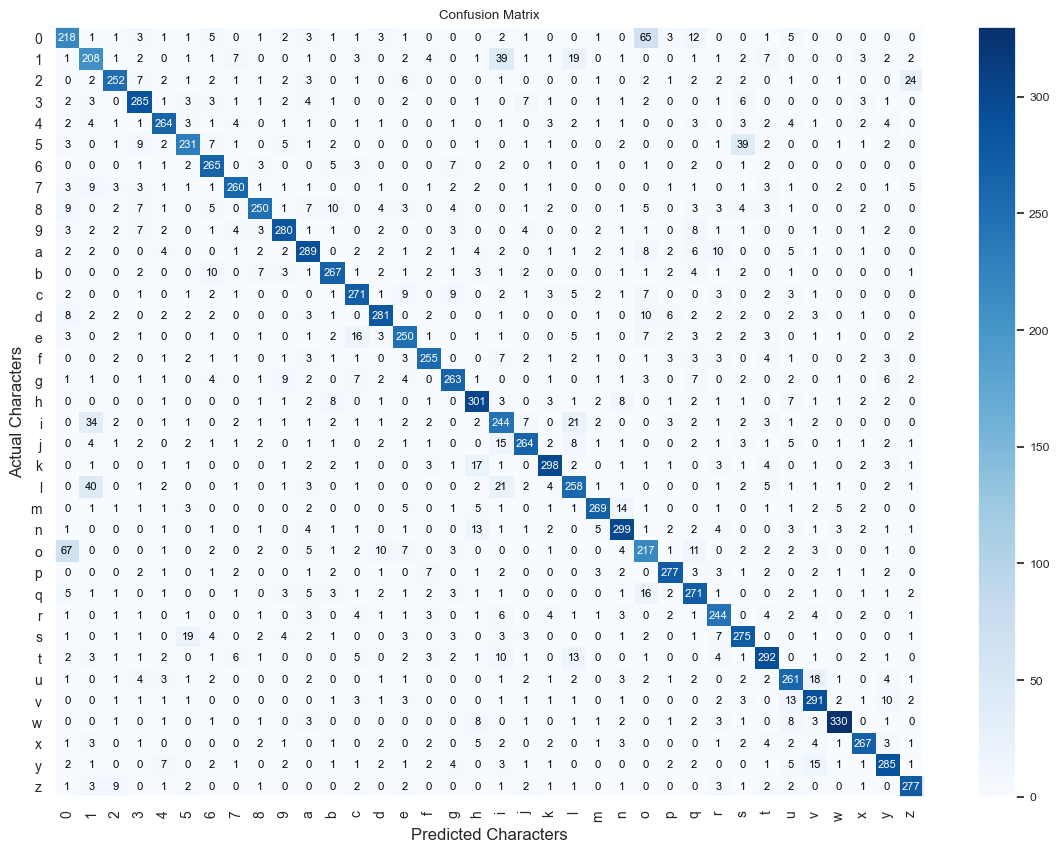

Total False Positives (FP): 11839
Total False Negatives (FN): 0

Overall Precision: 0.4480
Overall Recall: 1.0000
Overall F1 Score: 0.6188


In [539]:
# Initialize counters for true positives (TP) and false positives (FP)
characters = list(string.digits + string.ascii_lowercase)
tp_counts = {char: 0 for char in characters}
fp_counts = {char: {mistake: 0 for mistake in characters} for char in characters}

# Loop through each data entry and compute TP and FP for each character
for j in range(len(data_c)):
    separate_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_test(data_b[j])
    
    for i in range(len(separate_array)):
        if i < len(actual_array):
            predicted = separate_array[i]
            actual = actual_array[i]
            
            if predicted == actual:
                tp_counts[predicted] += 1
            else:
                fp_counts[actual][predicted] += 1  # Count FP for mistaken predictions

# Print True Positives (TP) for each character
print("True Positives for each character:")
for char in characters:
    print(f"{char}: TP = {tp_counts[char]}")

# Print False Positives (FP) for each character (i.e., how many times a character was mistaken for another)
print("\nFalse Positives (how many times a character was mistaken for something else):")
for char in characters:
    print(f"{char} mistaken as:")
    for mistaken_char in characters:
        if fp_counts[char][mistaken_char] > 0:
            print(f"  {mistaken_char}: {fp_counts[char][mistaken_char]} times")

# Optionally, print the confusion matrix (actual vs predicted counts)
print("\nConfusion Matrix (rows = actual characters, columns = predicted characters):")
confusion_matrix = np.zeros((len(characters), len(characters)), dtype=int)
for i in range(len(data_c)):
    separate_array = separate_characters(data_c[i])
    actual_array = select_and_separate_characters_with_test(data_b[i])

    for j in range(min(len(separate_array), len(actual_array))):
        predicted = separate_array[j]
        actual = actual_array[j]
        predicted_idx = characters.index(predicted)
        actual_idx = characters.index(actual)
        confusion_matrix[actual_idx, predicted_idx] += 1

# Print the confusion matrix for reference
import os
import csv
from Levenshtein import distance
import string
import numpy as np
import matplotlib.pyplot as plt

# List of possible characters (digits and lowercase letters)
characters = list(string.digits + string.ascii_lowercase)

def separate_characters(string):
    return list(string)

def select_and_separate_characters_with_test(string):
    start_index = string.find("test/")  
    if start_index == -1:
        return []

    start_index += len("test/")
    
    end_index = string.find("-", start_index)
    if end_index == -1:
        return []

    selected_part = string[start_index:end_index]
    return list(selected_part)

def extract_prediction_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "prediction" not in header:
            raise ValueError('"prediction" column not found in header.')
        prediction_index = header.index("prediction")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

def extract_path_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "path" not in header:
            raise ValueError('"path" column not found in header.')
        prediction_index = header.index("path")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

file_path = 'halcon_result1_dataset2_elim_line.csv'
data_c = extract_prediction_column(file_path)
data_b = extract_path_column(file_path)

# Initialize confusion matrix with zeros (rows for actual, columns for predicted)
confusion_matrix = np.zeros((len(characters), len(characters)), dtype=int)

# Loop through each data entry and compute the confusion matrix
for j in range(len(data_c)):
    separate_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_test(data_b[j])
    
    for i in range(min(len(separate_array), len(actual_array))):
        predicted = separate_array[i]
        actual = actual_array[i]
        
        # Find the indices of the actual and predicted characters in the 'characters' list
        predicted_idx = characters.index(predicted)
        actual_idx = characters.index(actual)
        
        # Increment the confusion matrix at the corresponding position
        confusion_matrix[actual_idx, predicted_idx] += 1

# Display the confusion matrix using matplotlib
plt.figure(figsize=(14, 10))  # Increase the size of the figure
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')  # Use 'auto' for aspect ratio
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
plt.xticks(np.arange(len(characters)), characters, rotation=90, fontsize=10)
plt.yticks(np.arange(len(characters)), characters, fontsize=10)

# Add gridlines for better readability
plt.grid(False)

# Display the values inside the matrix
for i in range(len(characters)):
    for j in range(len(characters)):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='white' if confusion_matrix[i, j] > np.max(confusion_matrix) / 2 else 'black', fontsize=8)

# Set labels and show the plot
plt.xlabel('Predicted Characters', fontsize=12)
plt.ylabel('Actual Characters', fontsize=12)
plt.show()


# Initialize counters for False Positives and False Negatives
total_fp = 0
total_fn = 0

# Loop through each pair of predicted and actual sequences
for j in range(len(data_c)):
    predicted_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    # Loop through the smaller of the two sequences
    for i in range(min(len(predicted_array), len(actual_array))):
        if predicted_array[i] != actual_array[i]:
            total_fp += 1  # Mismatched character in prediction is an FP
            total_fn += 1  # Mismatched character in actual is an FN

    # Extra characters in predicted sequence are FP
    if len(predicted_array) > len(actual_array):
        total_fp += len(predicted_array) - len(actual_array)

    # Extra characters in actual sequence are FN
    if len(actual_array) > len(predicted_array):
        total_fn += len(actual_array) - len(predicted_array)

# Print the results
print(f"Total False Positives (FP): {total_fp}")
print(f"Total False Negatives (FN): {total_fn}")

# Assume total_tp is already computed using the diagonal of the confusion matrix
# If not, sum the matches:
total_tp = sum(confusion_matrix[i, i] for i in range(len(characters)))

# Precision
precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0

# Recall
recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print(f"\nOverall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1_score:.4f}")



Confusion Matrix:
[[0 8 0 ... 0 0 7]
 [0 3 0 ... 0 0 4]
 [0 1 0 ... 0 0 3]
 ...
 [0 1 0 ... 0 0 4]
 [0 6 0 ... 0 0 3]
 [0 1 0 ... 0 0 4]]


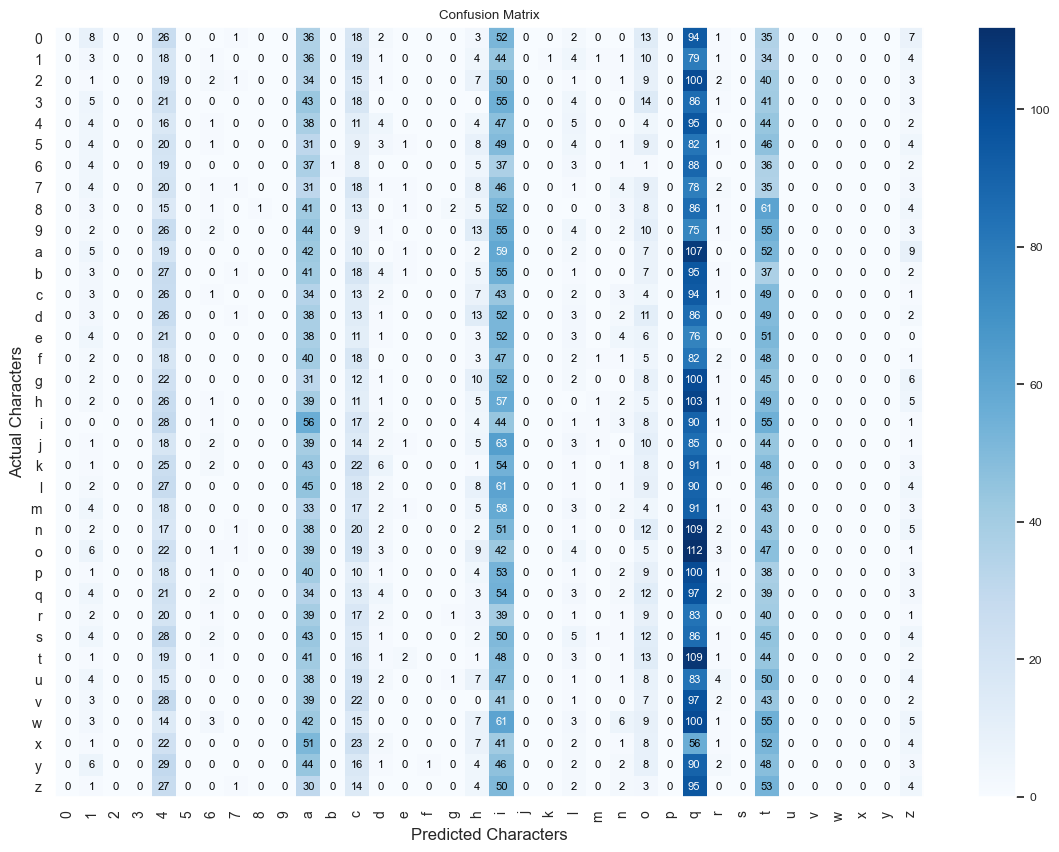

Total False Positives (FP): 13466
Total False Negatives (FN): 11629

Overall Precision: 0.0202
Overall Recall: 0.0233
Overall F1 Score: 0.0216


In [540]:
import os
import csv
from Levenshtein import distance
import string
import numpy as np
import matplotlib.pyplot as plt

# List of possible characters (digits and lowercase letters)
characters = list(string.digits + string.ascii_lowercase)

def separate_characters(string):
    return list(string)

def select_and_separate_characters_with_slash(string):
    start_index = string.find("\\")
    end_index = string.find("-", start_index)
    if start_index == -1 or end_index == -1:
        return []
    selected_part = string[start_index + 1:end_index]
    return list(selected_part)

def extract_prediction_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "prediction" not in header:
            raise ValueError('"prediction" column not found in header.')
        prediction_index = header.index("prediction")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

def extract_path_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "path" not in header:
            raise ValueError('"path" column not found in header.')
        prediction_index = header.index("path")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

file_path = 'cnn.csv'
data_c = extract_prediction_column(file_path)
data_b = extract_path_column(file_path)

# Initialize confusion matrix with zeros (rows for actual, columns for predicted)
confusion_matrix = np.zeros((len(characters), len(characters)), dtype=int)

# Loop through each data entry and compute the confusion matrix
for j in range(len(data_c)):
    separate_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    for i in range(min(len(separate_array), len(actual_array))):
        predicted = separate_array[i]
        actual = actual_array[i]
        
        # Find the indices of the actual and predicted characters in the 'characters' list
        predicted_idx = characters.index(predicted)
        actual_idx = characters.index(actual)
        
        # Increment the confusion matrix at the corresponding position
        confusion_matrix[actual_idx, predicted_idx] += 1

# Print confusion matrix for debugging
print("Confusion Matrix:")
print(confusion_matrix)


# Display the confusion matrix using matplotlib
plt.figure(figsize=(14, 10))  # Increase the size of the figure
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')  # Use 'auto' for aspect ratio
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
plt.xticks(np.arange(len(characters)), characters, rotation=90, fontsize=10)
plt.yticks(np.arange(len(characters)), characters, fontsize=10)

# Add gridlines for better readability
plt.grid(False)

# Display the values inside the matrix
for i in range(len(characters)):
    for j in range(len(characters)):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='white' if confusion_matrix[i, j] > np.max(confusion_matrix) / 2 else 'black', fontsize=8)

# Set labels and show the plot
plt.xlabel('Predicted Characters', fontsize=12)
plt.ylabel('Actual Characters', fontsize=12)
plt.show()


# Initialize counters for False Positives and False Negatives
total_fp = 0
total_fn = 0

# Loop through each pair of predicted and actual sequences
for j in range(len(data_c)):
    predicted_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    # Loop through the smaller of the two sequences
    for i in range(min(len(predicted_array), len(actual_array))):
        if predicted_array[i] != actual_array[i]:
            total_fp += 1  # Mismatched character in prediction is an FP
            total_fn += 1  # Mismatched character in actual is an FN

    # Extra characters in predicted sequence are FP
    if len(predicted_array) > len(actual_array):
        total_fp += len(predicted_array) - len(actual_array)

    # Extra characters in actual sequence are FN
    if len(actual_array) > len(predicted_array):
        total_fn += len(actual_array) - len(predicted_array)

# Print the results
print(f"Total False Positives (FP): {total_fp}")
print(f"Total False Negatives (FN): {total_fn}")

# Assume total_tp is already computed using the diagonal of the confusion matrix
# If not, sum the matches:
total_tp = sum(confusion_matrix[i, i] for i in range(len(characters)))

# Precision
precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0

# Recall
recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print(f"\nOverall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1_score:.4f}")



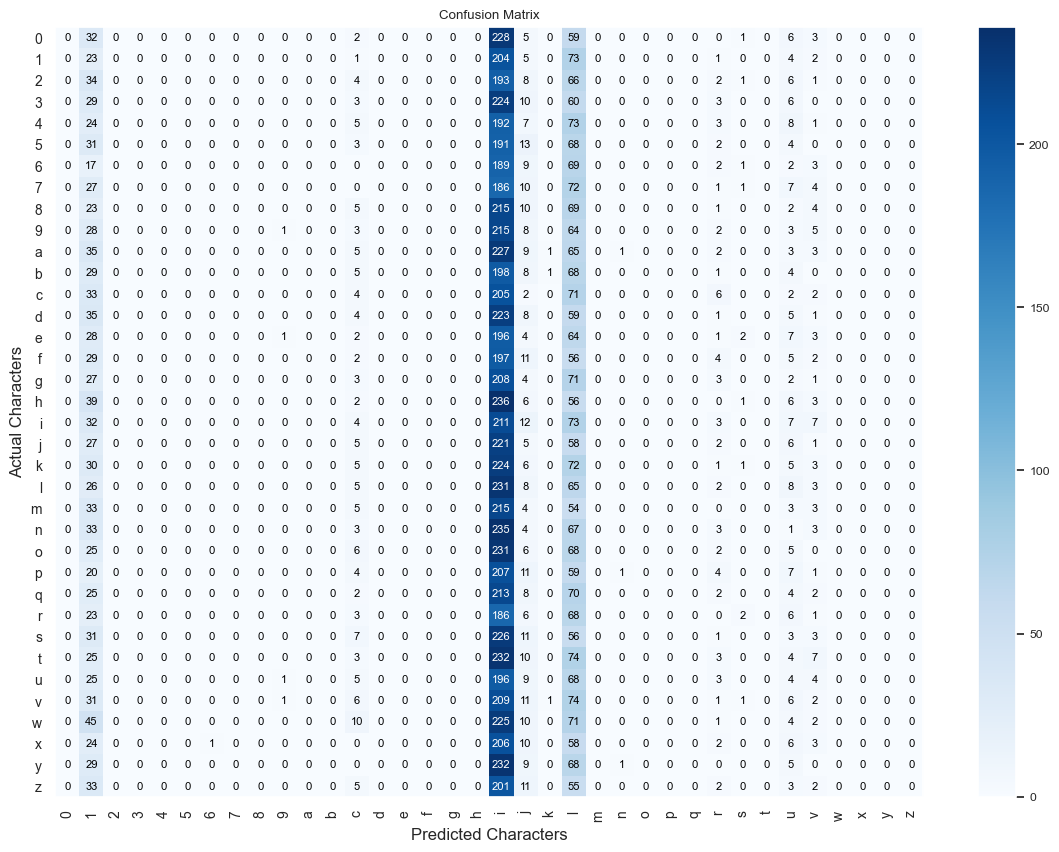

Total False Positives (FP): 12386
Total False Negatives (FN): 11695

Overall Precision: 0.0248
Overall Recall: 0.0262
Overall F1 Score: 0.0255


In [541]:
import os
import csv
from Levenshtein import distance
import string
import numpy as np
import matplotlib.pyplot as plt

# List of possible characters (digits and lowercase letters)
characters = list(string.digits + string.ascii_lowercase)

def separate_characters(string):
    return list(string)

def select_and_separate_characters_with_slash(string):
    start_index = string.find("\\")
    end_index = string.find("-", start_index)
    if start_index == -1 or end_index == -1:
        return []
    selected_part = string[start_index + 1:end_index]
    return list(selected_part)

def extract_prediction_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "prediction" not in header:
            raise ValueError('"prediction" column not found in header.')
        prediction_index = header.index("prediction")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

def extract_path_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "path" not in header:
            raise ValueError('"path" column not found in header.')
        prediction_index = header.index("path")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

file_path = 'resnet.csv'
data_c = extract_prediction_column(file_path)
data_b = extract_path_column(file_path)

# Initialize confusion matrix with zeros (rows for actual, columns for predicted)
confusion_matrix = np.zeros((len(characters), len(characters)), dtype=int)

# Loop through each data entry and compute the confusion matrix
for j in range(len(data_c)):
    separate_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    for i in range(min(len(separate_array), len(actual_array))):
        predicted = separate_array[i]
        actual = actual_array[i]
        
        # Find the indices of the actual and predicted characters in the 'characters' list
        predicted_idx = characters.index(predicted)
        actual_idx = characters.index(actual)
        
        # Increment the confusion matrix at the corresponding position
        confusion_matrix[actual_idx, predicted_idx] += 1

# Display the confusion matrix using matplotlib
plt.figure(figsize=(14, 10))  # Increase the size of the figure
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')  # Use 'auto' for aspect ratio
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
plt.xticks(np.arange(len(characters)), characters, rotation=90, fontsize=10)
plt.yticks(np.arange(len(characters)), characters, fontsize=10)

# Add gridlines for better readability
plt.grid(False)

# Display the values inside the matrix
for i in range(len(characters)):
    for j in range(len(characters)):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='white' if confusion_matrix[i, j] > np.max(confusion_matrix) / 2 else 'black', fontsize=8)

# Set labels and show the plot
plt.xlabel('Predicted Characters', fontsize=12)
plt.ylabel('Actual Characters', fontsize=12)
plt.show()


# Initialize counters for False Positives and False Negatives
total_fp = 0
total_fn = 0

# Loop through each pair of predicted and actual sequences
for j in range(len(data_c)):
    predicted_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    # Loop through the smaller of the two sequences
    for i in range(min(len(predicted_array), len(actual_array))):
        if predicted_array[i] != actual_array[i]:
            total_fp += 1  # Mismatched character in prediction is an FP
            total_fn += 1  # Mismatched character in actual is an FN

    # Extra characters in predicted sequence are FP
    if len(predicted_array) > len(actual_array):
        total_fp += len(predicted_array) - len(actual_array)

    # Extra characters in actual sequence are FN
    if len(actual_array) > len(predicted_array):
        total_fn += len(actual_array) - len(predicted_array)

# Print the results
print(f"Total False Positives (FP): {total_fp}")
print(f"Total False Negatives (FN): {total_fn}")

# Assume total_tp is already computed using the diagonal of the confusion matrix
# If not, sum the matches:
total_tp = sum(confusion_matrix[i, i] for i in range(len(characters)))

# Precision
precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0

# Recall
recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print(f"\nOverall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1_score:.4f}")



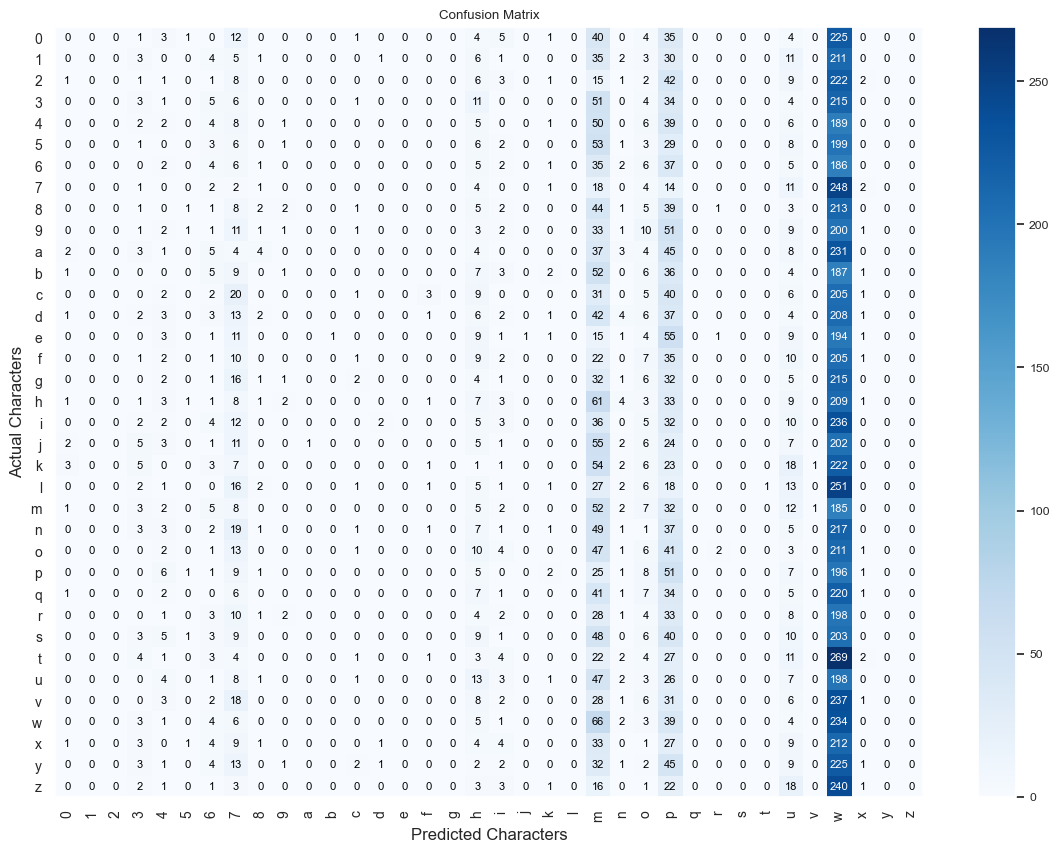

Total False Positives (FP): 12325
Total False Negatives (FN): 11634

Overall Precision: 0.0296
Overall Recall: 0.0313
Overall F1 Score: 0.0304


In [542]:
import os
import csv
from Levenshtein import distance
import string
import numpy as np
import matplotlib.pyplot as plt

# List of possible characters (digits and lowercase letters)
characters = list(string.digits + string.ascii_lowercase)

def separate_characters(string):
    return list(string)

def select_and_separate_characters_with_slash(string):
    start_index = string.find("\\")
    end_index = string.find("-", start_index)
    if start_index == -1 or end_index == -1:
        return []
    selected_part = string[start_index + 1:end_index]
    return list(selected_part)

def extract_prediction_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "prediction" not in header:
            raise ValueError('"prediction" column not found in header.')
        prediction_index = header.index("prediction")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

def extract_path_column(file_path):
    prediction_data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  
        if "path" not in header:
            raise ValueError('"path" column not found in header.')
        prediction_index = header.index("path")
        for row in reader:
            if len(row) > prediction_index and row[prediction_index]: 
                prediction_data.append(row[prediction_index])
    return prediction_data

file_path = 'resnetwithsmote.csv'
data_c = extract_prediction_column(file_path)
data_b = extract_path_column(file_path)

# Initialize confusion matrix with zeros (rows for actual, columns for predicted)
confusion_matrix = np.zeros((len(characters), len(characters)), dtype=int)

# Loop through each data entry and compute the confusion matrix
for j in range(len(data_c)):
    separate_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    for i in range(min(len(separate_array), len(actual_array))):
        predicted = separate_array[i]
        actual = actual_array[i]
        
        # Find the indices of the actual and predicted characters in the 'characters' list
        predicted_idx = characters.index(predicted)
        actual_idx = characters.index(actual)
        
        # Increment the confusion matrix at the corresponding position
        confusion_matrix[actual_idx, predicted_idx] += 1

# Display the confusion matrix using matplotlib
plt.figure(figsize=(14, 10))  # Increase the size of the figure
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')  # Use 'auto' for aspect ratio
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
plt.xticks(np.arange(len(characters)), characters, rotation=90, fontsize=10)
plt.yticks(np.arange(len(characters)), characters, fontsize=10)

# Add gridlines for better readability
plt.grid(False)

# Display the values inside the matrix
for i in range(len(characters)):
    for j in range(len(characters)):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='white' if confusion_matrix[i, j] > np.max(confusion_matrix) / 2 else 'black', fontsize=8)

# Set labels and show the plot
plt.xlabel('Predicted Characters', fontsize=12)
plt.ylabel('Actual Characters', fontsize=12)
plt.show()


# Initialize counters for False Positives and False Negatives
total_fp = 0
total_fn = 0

# Loop through each pair of predicted and actual sequences
for j in range(len(data_c)):
    predicted_array = separate_characters(data_c[j])
    actual_array = select_and_separate_characters_with_slash(data_b[j])
    
    # Loop through the smaller of the two sequences
    for i in range(min(len(predicted_array), len(actual_array))):
        if predicted_array[i] != actual_array[i]:
            total_fp += 1  # Mismatched character in prediction is an FP
            total_fn += 1  # Mismatched character in actual is an FN

    # Extra characters in predicted sequence are FP
    if len(predicted_array) > len(actual_array):
        total_fp += len(predicted_array) - len(actual_array)

    # Extra characters in actual sequence are FN
    if len(actual_array) > len(predicted_array):
        total_fn += len(actual_array) - len(predicted_array)

# Print the results
print(f"Total False Positives (FP): {total_fp}")
print(f"Total False Negatives (FN): {total_fn}")

# Assume total_tp is already computed using the diagonal of the confusion matrix
# If not, sum the matches:
total_tp = sum(confusion_matrix[i, i] for i in range(len(characters)))

# Precision
precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0

# Recall
recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print(f"\nOverall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1_score:.4f}")

